In [2]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os


train = []
train_image = []
train_labels = []
index = 0
lis = os.listdir('./img/train/')
for i in lis:
    i_lis = os.listdir(f'./img/train/{i}')
    for j in i_lis:
        print(j)
        img = Image.open(f'./img/train/{i}/{j}')
        img = img.convert('RGB')
        img = img.resize((224,224))
        img = np.array(img)
        train.append((img,index))
        # train_image.append(img)
        # train_labels.append(index)
    index += 1

basil (1).jpeg
basil (1).jpg
basil (1).png
basil (10).jpg
basil (11).jpg
basil (12).jpg
basil (13).jpg
basil (14).jpg
basil (15).jpg
basil (16).jpg
basil (17).jpg
basil (18).jpg
basil (19).jpg
basil (2).jpeg
basil (2).jpg
basil (2).png
basil (20).jpg
basil (21).jpg
basil (22).jpg
basil (23).jpg
basil (24).jpg
basil (25).jpg
basil (26).jpg
basil (3).jpeg
basil (3).jpg
basil (3).png
basil (4).jpg
basil (5).jpg
basil (6).jpg
basil (7).jpg
basil (8).jpg
basil (9).jpg
new_basil (1).jpeg
new_basil (1).jpg
new_basil (1).webp
new_basil (10).jpg
new_basil (10).webp
new_basil (100).jpg
new_basil (101).jpg
new_basil (102).jpg
new_basil (103).jpg
new_basil (104).jpg
new_basil (105).jpg
new_basil (106).jpg
new_basil (107).jpg
new_basil (108).jpg
new_basil (109).jpg
new_basil (11).jpg
new_basil (11).webp
new_basil (110).jpg
new_basil (111).jpg
new_basil (112).jpg
new_basil (113).jpg
new_basil (114).jpg
new_basil (115).jpg
new_basil (116).jpg
new_basil (117).jpg
new_basil (118).jpg
new_basil (119).jp

In [3]:
import random

random.shuffle(train)
train

[(array([[[ 44,  75,  43],
          [ 42,  73,  41],
          [ 36,  67,  36],
          ...,
          [222, 225, 232],
          [224, 227, 234],
          [225, 230, 233]],
  
         [[ 51,  82,  50],
          [ 49,  80,  48],
          [ 44,  75,  44],
          ...,
          [224, 227, 234],
          [225, 228, 235],
          [223, 228, 231]],
  
         [[ 56,  87,  55],
          [ 55,  86,  54],
          [ 50,  81,  50],
          ...,
          [225, 230, 234],
          [226, 231, 237],
          [222, 227, 230]],
  
         ...,
  
         [[238, 243, 247],
          [237, 242, 246],
          [237, 240, 245],
          ...,
          [ 13,  46,  17],
          [  9,  42,  11],
          [  8,  37,   7]],
  
         [[238, 243, 247],
          [237, 242, 246],
          [237, 240, 245],
          ...,
          [  3,  33,   5],
          [  0,  29,   1],
          [  0,  27,   0]],
  
         [[237, 246, 243],
          [236, 245, 242],
          [236, 242, 242

In [4]:
for i in range(len(train)):
    train_image.append(train[i][0])
    train_labels.append(train[i][1])

In [5]:
train_image=np.array(train_image)
train_labels=np.array(train_labels)
print(train_image.shape,train_labels.shape)

(9172, 224, 224, 3) (9172,)


In [6]:
import os
test = []
test_image = []
test_labels = []
index = 0
lis = os.listdir('./img/test/')
for i in lis:
    i_lis = os.listdir(f'./img/test/{i}')
    for j in i_lis:
        img = Image.open(f'./img/test/{i}/{j}')
        img = img.convert('RGB')
        img = img.resize((224,224))
        img = np.array(img)
        test.append((img,index))
        # test_image.append(img)
        # test_labels.append(index)
        
    index += 1

In [7]:
import random

random.shuffle(test)
test

[(array([[[235, 232, 225],
          [235, 232, 225],
          [236, 233, 226],
          ...,
          [235, 236, 231],
          [234, 235, 230],
          [234, 235, 230]],
  
         [[236, 233, 226],
          [235, 232, 225],
          [234, 231, 224],
          ...,
          [235, 236, 231],
          [234, 235, 230],
          [234, 235, 230]],
  
         [[236, 233, 226],
          [235, 232, 225],
          [235, 232, 225],
          ...,
          [234, 235, 230],
          [236, 237, 232],
          [234, 235, 230]],
  
         ...,
  
         [[254, 255, 250],
          [254, 255, 250],
          [254, 255, 250],
          ...,
          [229, 246, 254],
          [231, 248, 255],
          [230, 247, 255]],
  
         [[255, 255, 251],
          [255, 255, 251],
          [255, 255, 251],
          ...,
          [230, 247, 255],
          [230, 247, 255],
          [230, 247, 255]],
  
         [[255, 255, 251],
          [255, 255, 251],
          [255, 255, 251

In [8]:
for i in range(len(test)):
    test_image.append(test[i][0])
    test_labels.append(test[i][1])

In [9]:
test_image=np.array(test_image)
test_labels=np.array(test_labels)
print(test_image.shape,test_labels.shape)

(702, 224, 224, 3) (702,)


In [10]:
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images,labels

train_images, train_labels = get_preprocessed_data(train_image,train_labels)
test_images, test_labels = get_preprocessed_data(test_image,test_labels)

In [11]:
print('train dataset shape', train_images.shape, train_labels.shape)
print('test dataset shape',test_images.shape,test_labels.shape)

train dataset shape (9172, 224, 224, 3) (9172,)
test dataset shape (702, 224, 224, 3) (702,)


In [12]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)


print(train_oh_labels.shape,test_oh_labels.shape)

(9172, 5) (702, 5)


In [13]:
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,models
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense

# CONV
model = Sequential()
model.add(Conv2D(96,11,strides=4,input_shape=train_images.shape[1:]))
model.add(Conv2D(96,11,strides=4,activation='relu'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(256,5,strides=1,activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), strides=2))
model.add(BatchNormalization())

model.add(Conv2D(384,3,strides=1,activation='relu',padding='same'))
model.add(Conv2D(384,3,strides=1,activation='relu',padding='same'))
model.add(Conv2D(256,3,strides=1,activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())
model.add(Dense(4095,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 96)        1115232   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 96)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 5, 5, 96)         384       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 256)        0

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=10,validation_split=0.20)

Epoch 1/10
230/230 [==============================] - 135s 578ms/step - loss: 1.3669 - accuracy: 0.4186 - val_loss: 2.1017 - val_accuracy: 0.3771
Epoch 2/10
230/230 [==============================] - 138s 602ms/step - loss: 1.2179 - accuracy: 0.4923 - val_loss: 1.1857 - val_accuracy: 0.4943
Epoch 3/10
230/230 [==============================] - 181s 788ms/step - loss: 1.1371 - accuracy: 0.5314 - val_loss: 1.3475 - val_accuracy: 0.4289
Epoch 4/10
230/230 [==============================] - 193s 839ms/step - loss: 1.0953 - accuracy: 0.5478 - val_loss: 1.2126 - val_accuracy: 0.5139
Epoch 5/10
230/230 [==============================] - 193s 840ms/step - loss: 1.0731 - accuracy: 0.5559 - val_loss: 2.3998 - val_accuracy: 0.4300
Epoch 6/10
230/230 [==============================] - 191s 830ms/step - loss: 1.0159 - accuracy: 0.5829 - val_loss: 1.2339 - val_accuracy: 0.4850
Epoch 7/10
230/230 [==============================] - 193s 837ms/step - loss: 1.0039 - accuracy: 0.5895 - val_loss: 1.2188 -

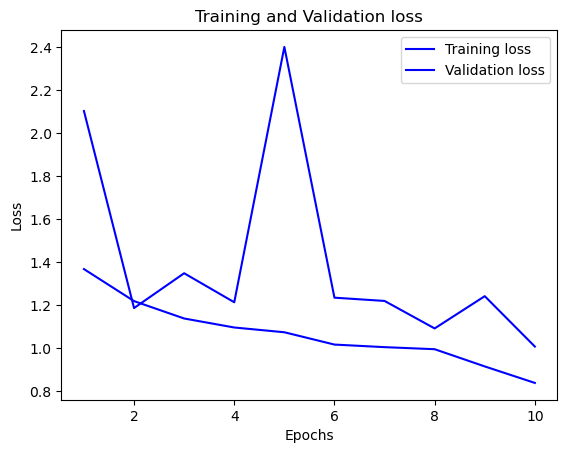

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

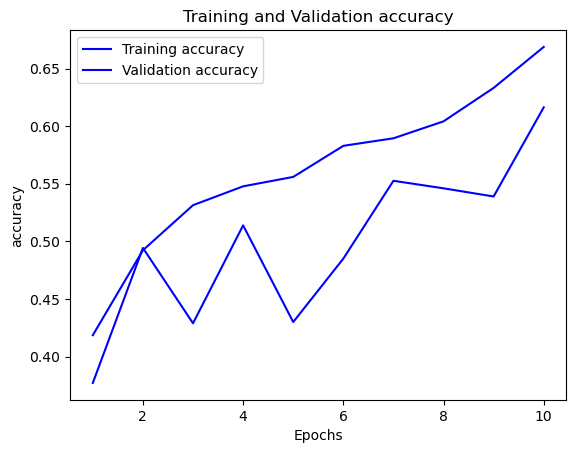

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs, val_acc, 'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()